# Описание проекта

Компания «ГлавРосГосНефть». 

Нужно решить, где бурить новую скважину. 
Шаги для выбора локации обычно такие:
1. В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
2. Строят модель для предсказания объёма запасов в новых скважинах;
3. Выбирают скважины с самыми высокими оценками значений;
4. Определяют регион с максимальной суммарной прибылью отобранных скважин.

Имеется:
- Пробы нефти в трёх регионах. 

Нужно сделать: 
- Построите модель для определения региона, где добыча принесёт наибольшую прибыль. 
- Проанализируйте возможную прибыль и риски техникой Bootstrap.

# Описание данныех 
- d — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

# Условия задачи:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [4]:
# pip install phik

In [5]:
pip install --upgrade seaborn pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns

# дополнительные классы для преобразования данных
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Загрузка данных

In [9]:
try:
    geo_data_0 = pd.read_csv('geo_data_0.csv')
except:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

try:
    geo_data_1 = pd.read_csv('geo_data_1.csv')
except:
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

try:
    geo_data_2 = pd.read_csv('geo_data_2.csv')
except:
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [10]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [11]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [12]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [13]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Итоги
1. В файлах нет пропусков
2. Файлы не требуют приведения типов

## Предобработка данных

#### Проверка на дублирование и анализ пропусков

In [19]:
len(geo_data_0.id.unique()) == len(geo_data_0.id)

False

In [20]:
geo_data_0.id.value_counts()[:15]

id
fiKDv    2
QcMuo    2
AGS9W    2
Tdehs    2
74z30    2
A5aEY    2
bsk9y    2
TtcGQ    2
HZww2    2
bxg6G    2
iAaqy    1
PQ2MT    1
PEtNa    1
UjCKX    1
3OKld    1
Name: count, dtype: int64

In [21]:
len(geo_data_1.id.unique()) == len(geo_data_1.id)

False

In [22]:
geo_data_1.id.value_counts()[:10]

id
wt4Uk    2
LHZR0    2
5ltQ6    2
bfPNe    2
kBEdx    1
lAVJZ    1
ENYw9    1
gMInh    1
uPzFJ    1
w75gp    1
Name: count, dtype: int64

In [23]:
len(geo_data_2.id.unique()) == len(geo_data_2.id)

False

In [24]:
geo_data_2.id.value_counts()[:10]

id
VF7Jo    2
KUPhW    2
xCHr8    2
Vcm5J    2
fwXo0    1
B9hou    1
gtl32    1
V5b65    1
rpqpj    1
Gibob    1
Name: count, dtype: int64

In [25]:
geo_data_0[geo_data_0.id == 'fiKDv']

,id,f0,f1,f2,product
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
90815,fiKDv,0.049883,0.841313,6.394613,137.346586


In [26]:
# в файлах есть дублирование по id. 
# удаление дублирование. Остается первая строчка
geo_data_0 = geo_data_0.drop_duplicates(subset=['id'], keep='first')
geo_data_1 = geo_data_1.drop_duplicates(subset=['id'], keep='first')
geo_data_2 = geo_data_2.drop_duplicates(subset=['id'], keep='first')

### Итоги
- В данных были обнаружены дубли, по столбцу id. Дубли удаление, оставлены только первые строки

## Исследовательский анализ данных

In [29]:
# так как все признаки числовые достаточно будет построить распределение по каждому из них для понимания и оценки
# запишим столбцы с признаками в отдельную переменную
columns = geo_data_0.columns[1:]

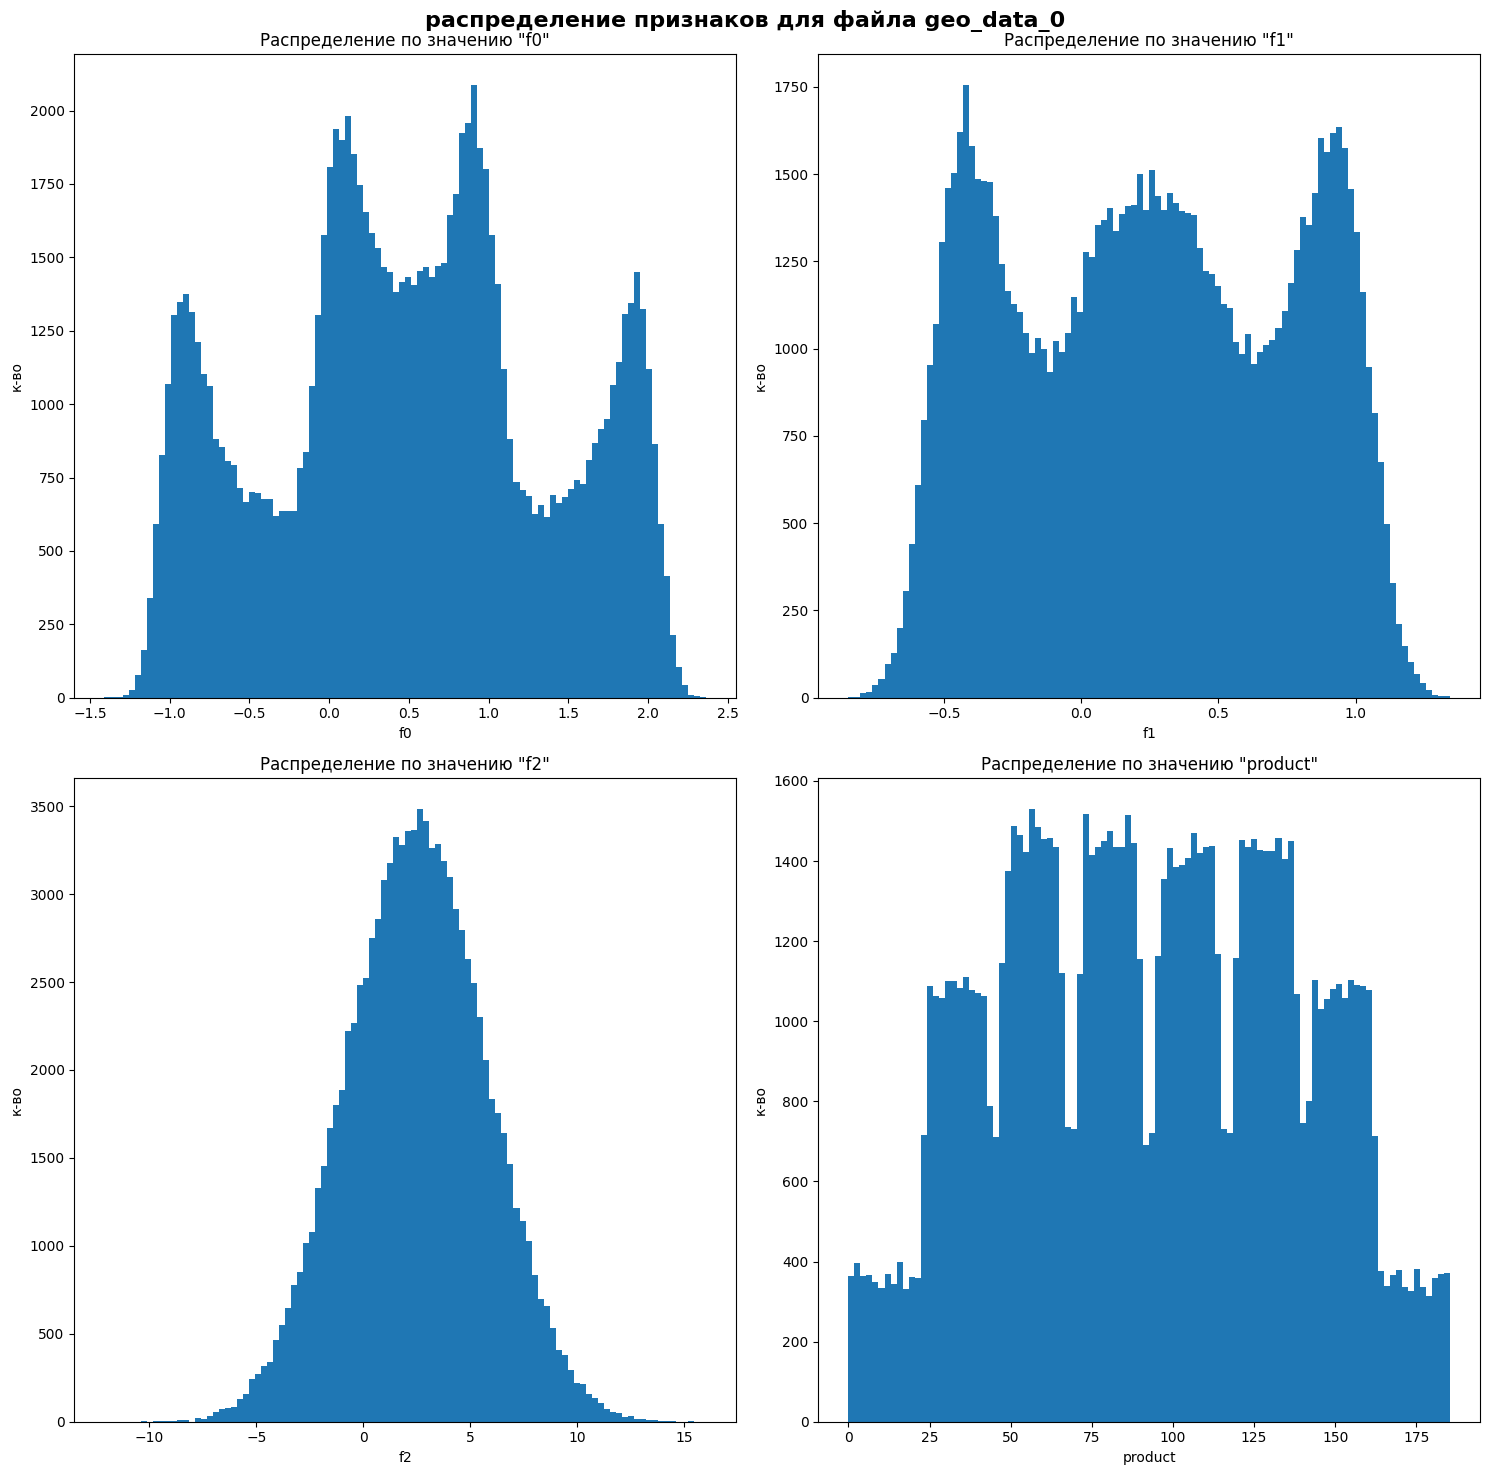

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
plt.suptitle('распределение признаков для файла geo_data_0', fontsize=16, fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(columns):
    t = 'Распределение по значению "'+col+'"'
    axes[i].hist(geo_data_0[col], bins = 100)
    axes[i].set_title(t)
    plt.tight_layout()
    axes[i].set_ylabel('к-во')
    axes[i].set_xlabel(col)

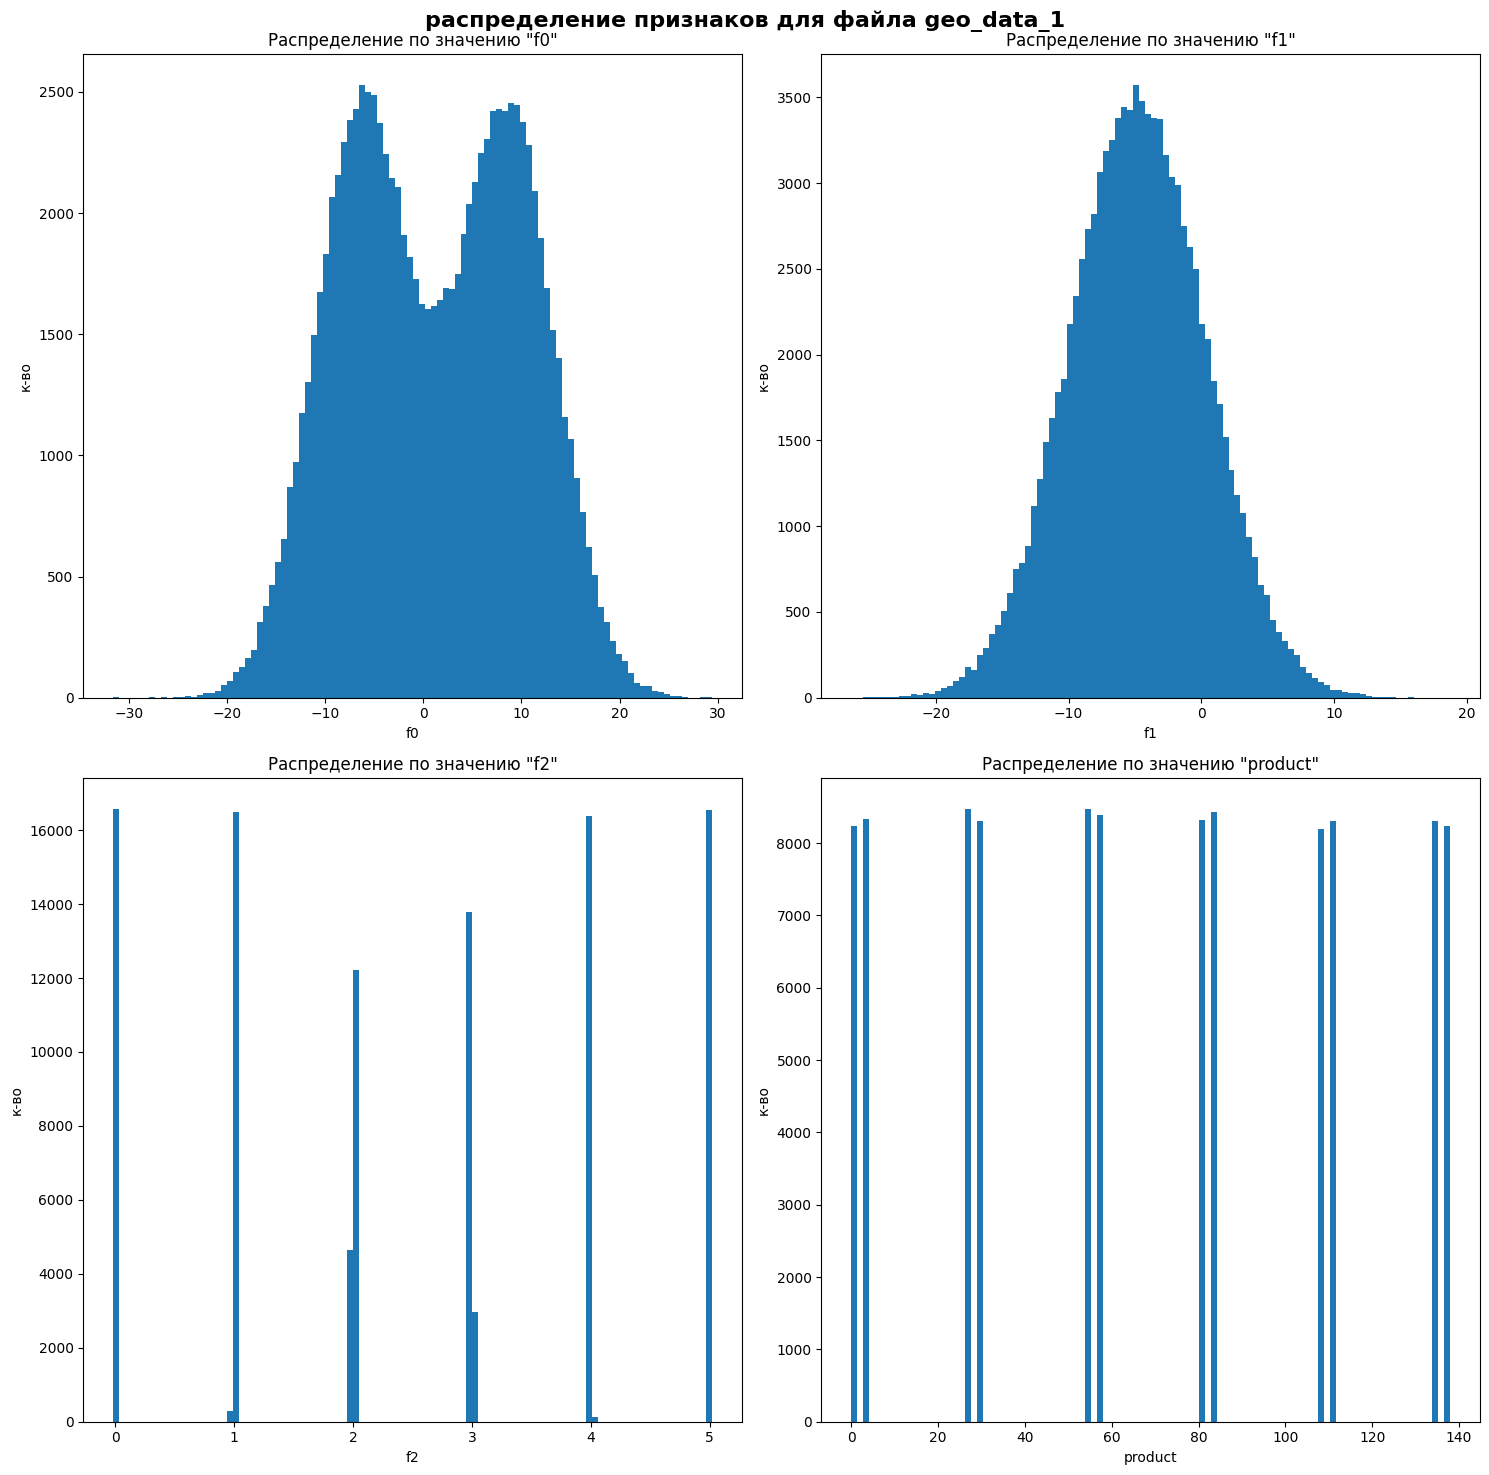

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
plt.suptitle('распределение признаков для файла geo_data_1', fontsize=16, fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(columns):
    t = 'Распределение по значению "'+col+'"'
    axes[i].hist(geo_data_1[col], bins = 100)
    axes[i].set_title(t)
    plt.tight_layout()
    axes[i].set_ylabel('к-во')
    axes[i].set_xlabel(col)

In [32]:
geo_data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


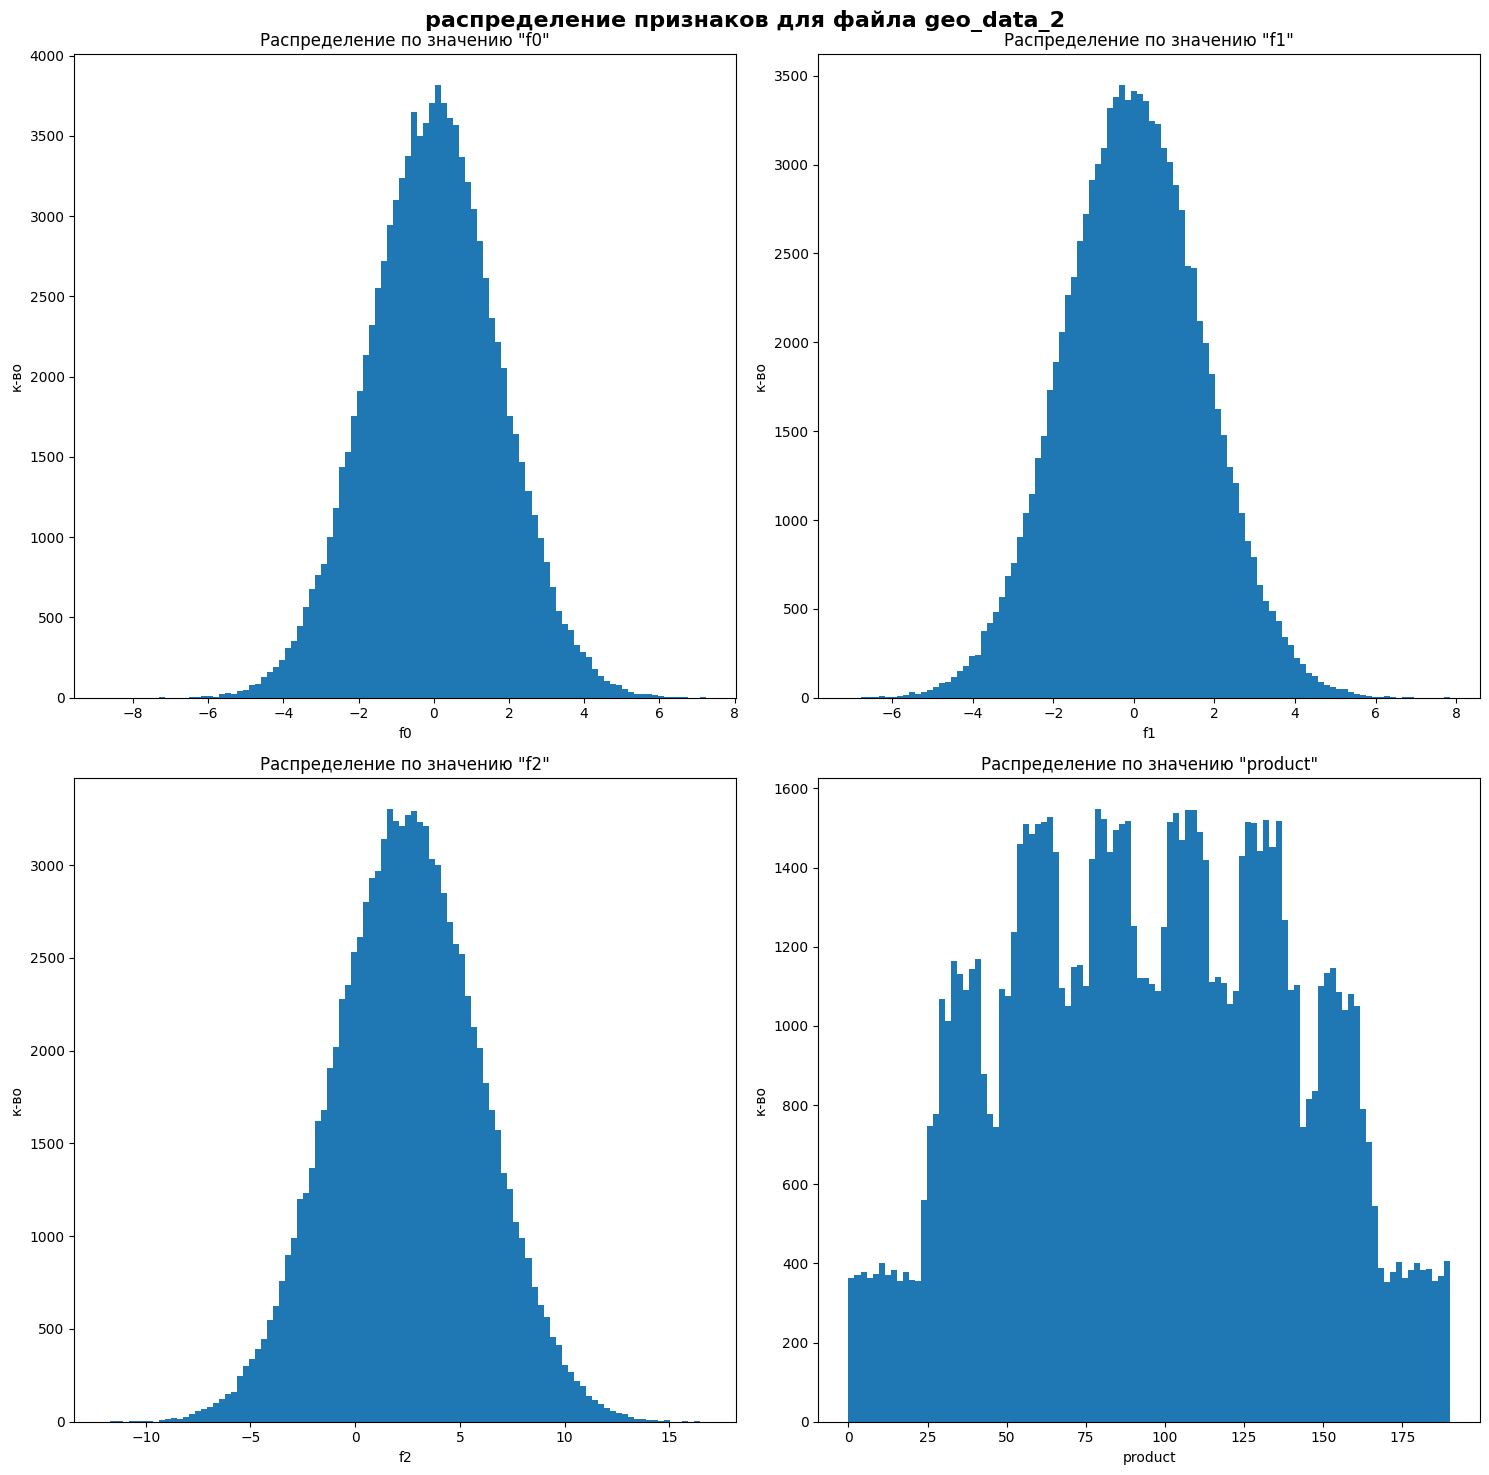

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
plt.suptitle('распределение признаков для файла geo_data_2', fontsize=16, fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(columns):
    t = 'Распределение по значению "'+col+'"'
    axes[i].hist(geo_data_2[col], bins = 100)
    axes[i].set_title(t)
    plt.tight_layout()
    axes[i].set_ylabel('к-во')
    axes[i].set_xlabel(col)

In [34]:
correlation_matrix = geo_data_0[columns].corr()

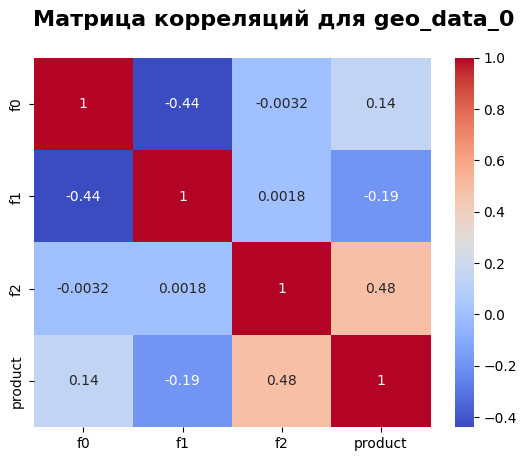

In [35]:
correlation_matrix = geo_data_0[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.suptitle('Матрица корреляций для geo_data_0', fontsize=16, fontweight='bold')
plt.show()

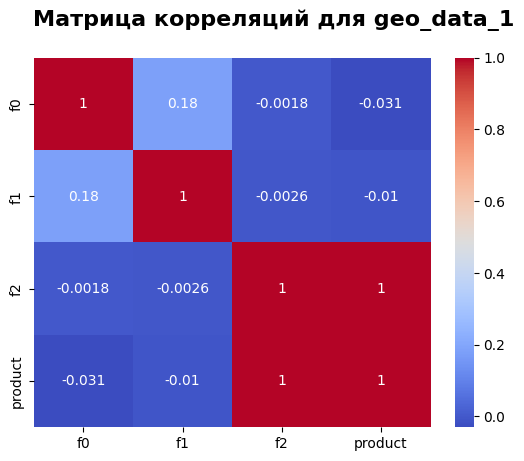

In [36]:
correlation_matrix = geo_data_1[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.suptitle('Матрица корреляций для geo_data_1', fontsize=16, fontweight='bold')
plt.show()

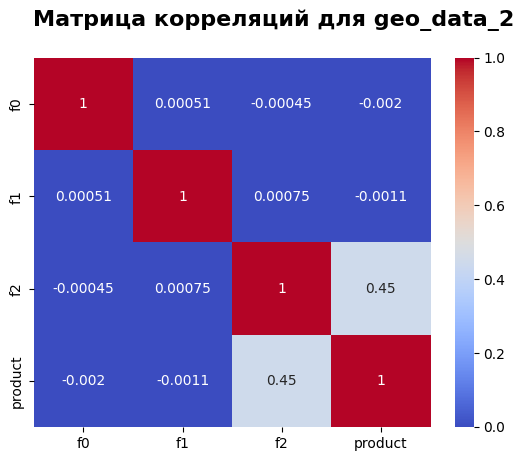

In [37]:
correlation_matrix = geo_data_2[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.suptitle('Матрица корреляций для geo_data_2', fontsize=16, fontweight='bold')
plt.show()

### Итоги

1. Все три файла имеют разные распредления признаков
2. geo_data_1 имеет корреляцтю между признаками f2 и product, которая равна 1
3. Похоже что второй регион имеем дискретные показатели f2 и product, а ожидается непрерывые. Так как нет связи с заказчиком для уточнения, возможно что-то происзошло на моменте сбора данных

In [39]:
def geo_product_predict (X_train, X_test, y_train, y_test):
    
    # создайте переменную с экземпляром класса StandardScaler()
    scaler = StandardScaler()

    # масштабируем и обучаем тренировочную выборку количественных признаков
    X_train_scaled = scaler.fit_transform(X_train[col_names])

    # масштабируем тестовую выборку количественных признаков
    X_test_scaled = scaler.transform(X_test[col_names])
    
    X_train = X_train_scaled
    X_test = X_test_scaled
    
    # инициализируйте модель линейной регрессии
    model_lr  = LinearRegression()
    
    # обучите модель на тренировочных данных
    model_lr.fit(X_train, y_train)
    
    # предсказание
    predictions = model_lr.predict(X_test)

    #RMSE
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    return rmse, predictions, y_test

In [40]:
columns[:-1]

Index(['f0', 'f1', 'f2'], dtype='object')

In [41]:
columns[-1]

'product'

In [42]:
col_names = columns[:-1]

## Предсказания для каждого региона

### Предсказание для geo_data_0

In [45]:
X = geo_data_0[columns[:-1]]
y = geo_data_0[columns[-1]]

# создание константы RANDOM_STATE
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = RANDOM_STATE, test_size = 0.25)

geo_data_0_rmse, geo_data_0_predict, geo_data_0_target = geo_product_predict(X_train, X_test, y_train, y_test)

In [46]:
print('RMSE для первого региона: ',geo_data_0_rmse)
print('средний запас предсказанного сырья для первого региона: ',geo_data_0_predict.mean())

RMSE для первого региона:  37.68508926201444
средний запас предсказанного сырья для первого региона:  92.60984027552017


### Предсказание для geo_data_1

In [48]:
X = geo_data_1[columns[:-1]]
y = geo_data_1[columns[-1]]

# создание константы RANDOM_STATE
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = RANDOM_STATE, test_size = 0.25)

geo_data_1_rmse, geo_data_1_predict, geo_data_1_target = geo_product_predict(X_train, X_test, y_train, y_test)

In [49]:
print('RMSE для второго региона: ',geo_data_1_rmse)
print('средний запас предсказанного сырья для второго региона: ',geo_data_1_predict.mean())

RMSE для второго региона:  0.8928265978121388
средний запас предсказанного сырья для второго региона:  68.57703454115173


### Предсказание для geo_data_2

In [51]:
X = geo_data_2[columns[:-1]]
y = geo_data_2[columns[-1]]

# создание константы RANDOM_STATE
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = RANDOM_STATE, test_size = 0.25)

geo_data_2_rmse, geo_data_2_predict, geo_data_2_target = geo_product_predict(X_train, X_test, y_train, y_test)

In [52]:
print('RMSE для третьего региона: ',geo_data_2_rmse)
print('средний запас предсказанного сырья для третьего региона: ',geo_data_2_predict.mean())

RMSE для третьего региона:  40.080822438088305
средний запас предсказанного сырья для третьего региона:  94.93478722287514


### Итоги

- Лучше всего предсказания во втором регионе (geo_data_1). Это связано с тем, что один из признаков имеет корреляцию равную 1 с целевой переменной
- В остальных двух регионах, оценка RMSE: 37 для первого и 40 для второго. Можно сказать что модель ошибается в среднем на 37 и 40 тыс. баррелей соответсвенно.

## Подготовка к расчёту прибыли

In [55]:
# цена за 1000 бареллей
barrel_price = 450 * 10**3
# бюджет на разработку скважин
budget = 10 * 10**9
# 200 лучших скважин
best_point = 200
# выборка для определения лучших
selection_point = 500

In [56]:
# определяем сколько барелей в среднем должна приносить одна скважина
target_barrels = round(budget/best_point/barrel_price,2)

In [57]:
print('средний запас предсказанного сырья для первого региона: ',geo_data_0_predict.mean())
print('средний запас предсказанного сырья для второго региона: ',geo_data_1_predict.mean())
print('средний запас предсказанного сырья для третьего региона: ',geo_data_2_predict.mean())
print('расчитанное к-во баррелей для безубыточности: ',target_barrels)

средний запас предсказанного сырья для первого региона:  92.60984027552017
средний запас предсказанного сырья для второго региона:  68.57703454115173
средний запас предсказанного сырья для третьего региона:  94.93478722287514
расчитанное к-во баррелей для безубыточности:  111.11


### Итоги

- Среднее предсказанное значение по всем трем регионам значительно меньше чем расчитанное, для безубыточного производства

## Подсчет лучших скважин в регионе

In [132]:
# приведение индексов к единому формату
geo_data_0_predict_series = pd.Series(geo_data_0_predict, index=geo_data_0_target.index)
geo_data_1_predict_series = pd.Series(geo_data_1_predict, index=geo_data_1_target.index)
geo_data_2_predict_series = pd.Series(geo_data_2_predict, index=geo_data_2_target.index)

In [134]:
# функция определяет самые высокие по добыче точки на сонове предсказания можели
# с помощью count регулируется ТОП прибыльных скважин
def profit(target, predict, count):
    predict_sorted = predict.sort_values(ascending=False)
    selected = target[predict_sorted.index][:count]
    return selected.sum() * barrel_price - budget

In [138]:
print('Прибыль от ТОП 200 скважин первого региона', f"{profit(geo_data_0_target,geo_data_0_predict_series,best_point):,}")
print('Прибыль от ТОП 200 скважин второго региона', f"{profit(geo_data_1_target,geo_data_1_predict_series,best_point):,}")
print('Прибыль от ТОП 200 скважин третьего региона', f"{profit(geo_data_2_target,geo_data_2_predict_series,best_point):,}")

Прибыль от ТОП 200 скважин первого региона 3,468,529,787.422388
Прибыль от ТОП 200 скважин второго региона 2,415,086,696.681511
Прибыль от ТОП 200 скважин третьего региона 2,396,613,000.939848


### Итоги
- Все три региона показывают прибыль по лучшим 200 скважинам

In [167]:
state = RandomState(12345) 

In [169]:
def bootstrap_analysis(target, predictions):
    profits = []
    for i in range(1000):
        # отбираем реальные значения и на основе индексов отбираем предсказанные
        # отбираем рандомные 500 скважин
        target_subsample = target.sample(n=selection_point, replace=True, random_state=state)
        predict_subsample = predictions[target_subsample.index] 
        
        profits.append(profit(target_subsample, predict_subsample, best_point))
    
    profits = pd.Series(profits)
    mean_profit = profits.mean()
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    risk = (profits < 0).mean()

    return profits, mean_profit, confidence_interval, risk

In [171]:
profits_0, mean_0, ci_0, risk_0 = bootstrap_analysis(geo_data_0_target, geo_data_0_predict_series)

In [172]:
profits_1, mean_1, ci_1, risk_1 = bootstrap_analysis(geo_data_1_target, geo_data_1_predict_series)

In [173]:
profits_2, mean_2, ci_2, risk_2 = bootstrap_analysis(geo_data_2_target, geo_data_2_predict_series)

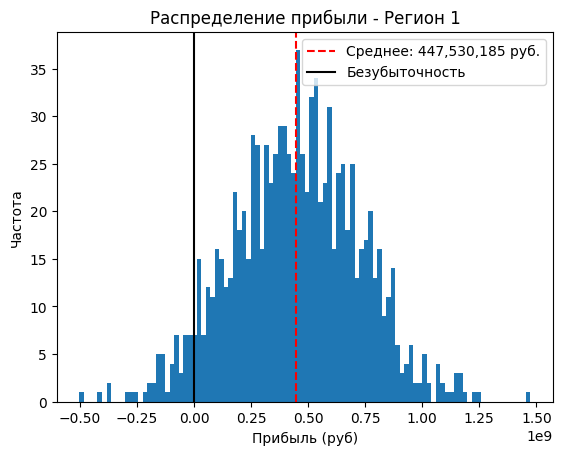

In [176]:
plt.hist(profits_0, bins=100)
plt.axvline(mean_0, color='red', linestyle='--', label=f'Среднее: {mean_0:,.0f} руб.')
plt.axvline(0, color='black', linestyle='-', label='Безубыточность')
plt.title('Распределение прибыли - Регион 1')
plt.xlabel('Прибыль (руб)')
plt.ylabel('Частота')
plt.legend()

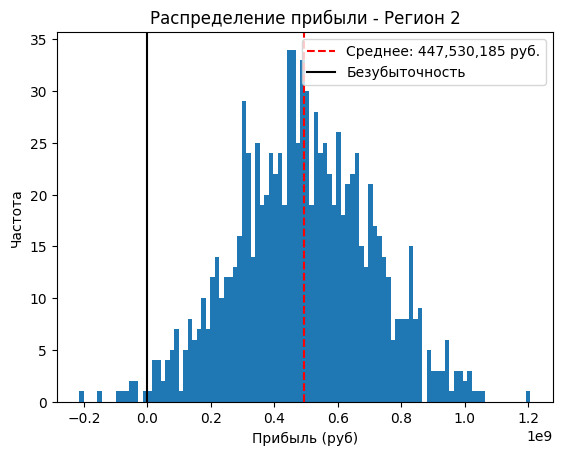

In [179]:
plt.hist(profits_1, bins=100)
plt.axvline(mean_1, color='red', linestyle='--', label=f'Среднее: {mean_0:,.0f} руб.')
plt.axvline(0, color='black', linestyle='-', label='Безубыточность')
plt.title('Распределение прибыли - Регион 2')
plt.xlabel('Прибыль (руб)')
plt.ylabel('Частота')
plt.legend()

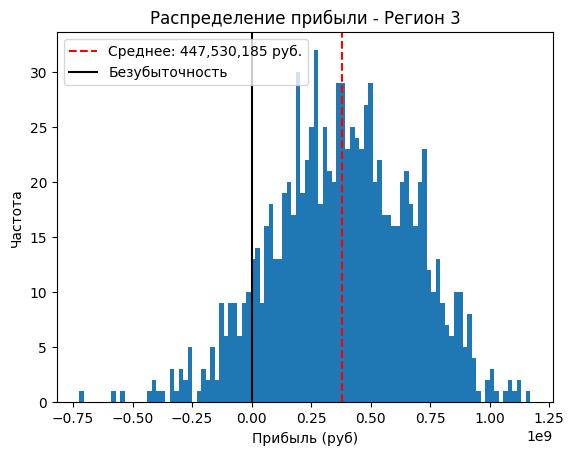

In [181]:
plt.hist(profits_2, bins=100)
plt.axvline(mean_2, color='red', linestyle='--', label=f'Среднее: {mean_0:,.0f} руб.')
plt.axvline(0, color='black', linestyle='-', label='Безубыточность')
plt.title('Распределение прибыли - Регион 3')
plt.xlabel('Прибыль (руб)')
plt.ylabel('Частота')
plt.legend()

In [164]:
# Проверяем условие: риск убытков < 2.5% и максимальная средняя прибыль
valid_regions = []
regions_data = [
    (1, mean_0, risk_0, ci_0, profits_0),
    (2, mean_1, risk_1, ci_1, profits_1), 
    (3, mean_2, risk_2, ci_2, profits_2)
]

for region, mean, risk, ci, profits in regions_data:
    if risk < 0.025:
        valid_regions.append((region, mean, risk, ci, profits))

if valid_regions:
    # Выбираем регион с максимальной средней прибылью среди допустимых
    best_region = max(valid_regions, key=lambda x: x[1])
    region_num, mean_profit, risk_val, ci_val, profits_data = best_region
    
    print(f"Рекомендуемый регион для разработки: Регион {region_num}")
    print(f"Обоснование:")
    print(f"- Средняя прибыль: {mean_profit:,.2f} руб.")
    print(f"- Риск убытков: {risk_val:.2%} (меньше порога 2.5%)")
    print(f"- 95% доверительный интервал: [{ci_val[0]:,.2f}, {ci_val[1]:,.2f}] руб.")
    
    # Дополнительная информация о распределении прибыли
    print(f"- Минимальная прибыль в bootstrap: {profits_data.min():,.2f} руб.")
    print(f"- Максимальная прибыль в bootstrap: {profits_data.max():,.2f} руб.")
    
    print(f"\nСравнение с другими регионами:")
    for region, mean, risk, ci, profits in regions_data:
        status = "ДОПУСТИМЫЙ" if risk < 0.025 else "НЕДОПУСТИМЫЙ (риск > 2.5%)"
        print(f"Регион {region}: {status}")
        print(f"  Средняя прибыль: {mean:,.2f} руб.")
        print(f"  Риск убытков: {risk:.2%}")
        print(f"  Доверительный интервал: [{ci[0]:,.2f}, {ci[1]:,.2f}] руб.")
        print()
        
else:
    print("НИ ОДИН РЕГИОН НЕ СООТВЕТСТВУЕТ ТРЕБОВАНИЯМ ПО РИСКУ!")

Рекомендуемый регион для разработки: Регион 2
Обоснование:
- Средняя прибыль: 495,145,786.90 руб.
- Риск убытков: 0.60% (меньше порога 2.5%)
- 95% доверительный интервал: [99,501,978.21, 930,840,068.15] руб.
- Минимальная прибыль в bootstrap: -151,589,418.24 руб.
- Максимальная прибыль в bootstrap: 1,222,529,295.70 руб.

Сравнение с другими регионами:
Регион 1: НЕДОПУСТИМЫЙ (риск > 2.5%)
  Средняя прибыль: 436,358,818.42 руб.
  Риск убытков: 5.70%
  Доверительный интервал: [-105,247,840.82, 987,430,033.51] руб.

Регион 2: ДОПУСТИМЫЙ
  Средняя прибыль: 495,145,786.90 руб.
  Риск убытков: 0.60%
  Доверительный интервал: [99,501,978.21, 930,840,068.15] руб.

Регион 3: НЕДОПУСТИМЫЙ (риск > 2.5%)
  Средняя прибыль: 387,286,393.26 руб.
  Риск убытков: 8.10%
  Доверительный интервал: [-169,966,559.63, 927,256,764.43] руб.



## ИТОГ
- Рекомендуеся выбрать регио 2, так как он имеет самый низкий риск убытков
- Так же стоит обратить внимание, что только этот регион показывает кореляцию целевой переменной с f2, что может натолкнуть на неправильно измерений в двух остальных, или же ложноположительный результат, в случае, если при сборе данных с этого региона допущена ошибка (дискретные велечины в f2 и product)